# GridFit Checker

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.append('/sdf/home/a/abrought/bin')
from SpotAnalysis import *
import matplotlib.pyplot as plt
from IPython.display import display, Latex
import sys
sys.path.append('/sdf/home/a/abrought/alternate_branches/mixcoatl/python')
from mixcoatl import characterizeSpots
from mixcoatl import gridFitTask
import lsst.afw.display as afwDisplay
import lsst.afw.image as afwImage

def display(exposure,title=None):
    afwDisplay.setDefaultBackend('matplotlib') 
    fig = plt.figure(figsize=(10,10))
    afw_display = afwDisplay.Display(1)
    afw_display.scale('asinh', 'zscale')
    afw_display.mtv(exposure.getImage())
    plt.title(title)
    plt.gca().axis('off')

# From pickle

In [2]:
# Use sensor data
sensor = "R03_S12"
detector = 23

# Butler repository
outdir = "/sdf/home/a/abrought/run5/BF/data/2023-05-15/"

# Retrieve data
data_uncorrected = readData( outdir + "data_13251_R24_S11_2023-04-27T14:23:49_680nm_uncorrected.pkl", \
                             expstoremove=1)
outdir = "/sdf/home/a/abrought/run5/BF/data/2023-04-28/"
data_corrected =   readData( outdir + "data_13251_R24_S11_2023-05-01T18:13:48_680nm_corrected.trunc_to_ptc.amatrix.noCorrModel.pkl", \
                             expstoremove=1)
                             #outdir + "data_13248_R03_S12_2022-10-03T18:35:57_680nm_corrected_craigs_rec.pkl", \



FileNotFoundError: [Errno 2] No such file or directory: '/home/a/abrought/run5/BF/data/2023-01-24/data_13251_R24_S11_2023-04-27T14:23:49_680nm_uncorrected.pkl'

In [42]:
mask = data_uncorrected['exptime'] == 20.0
data = data_uncorrected[mask]

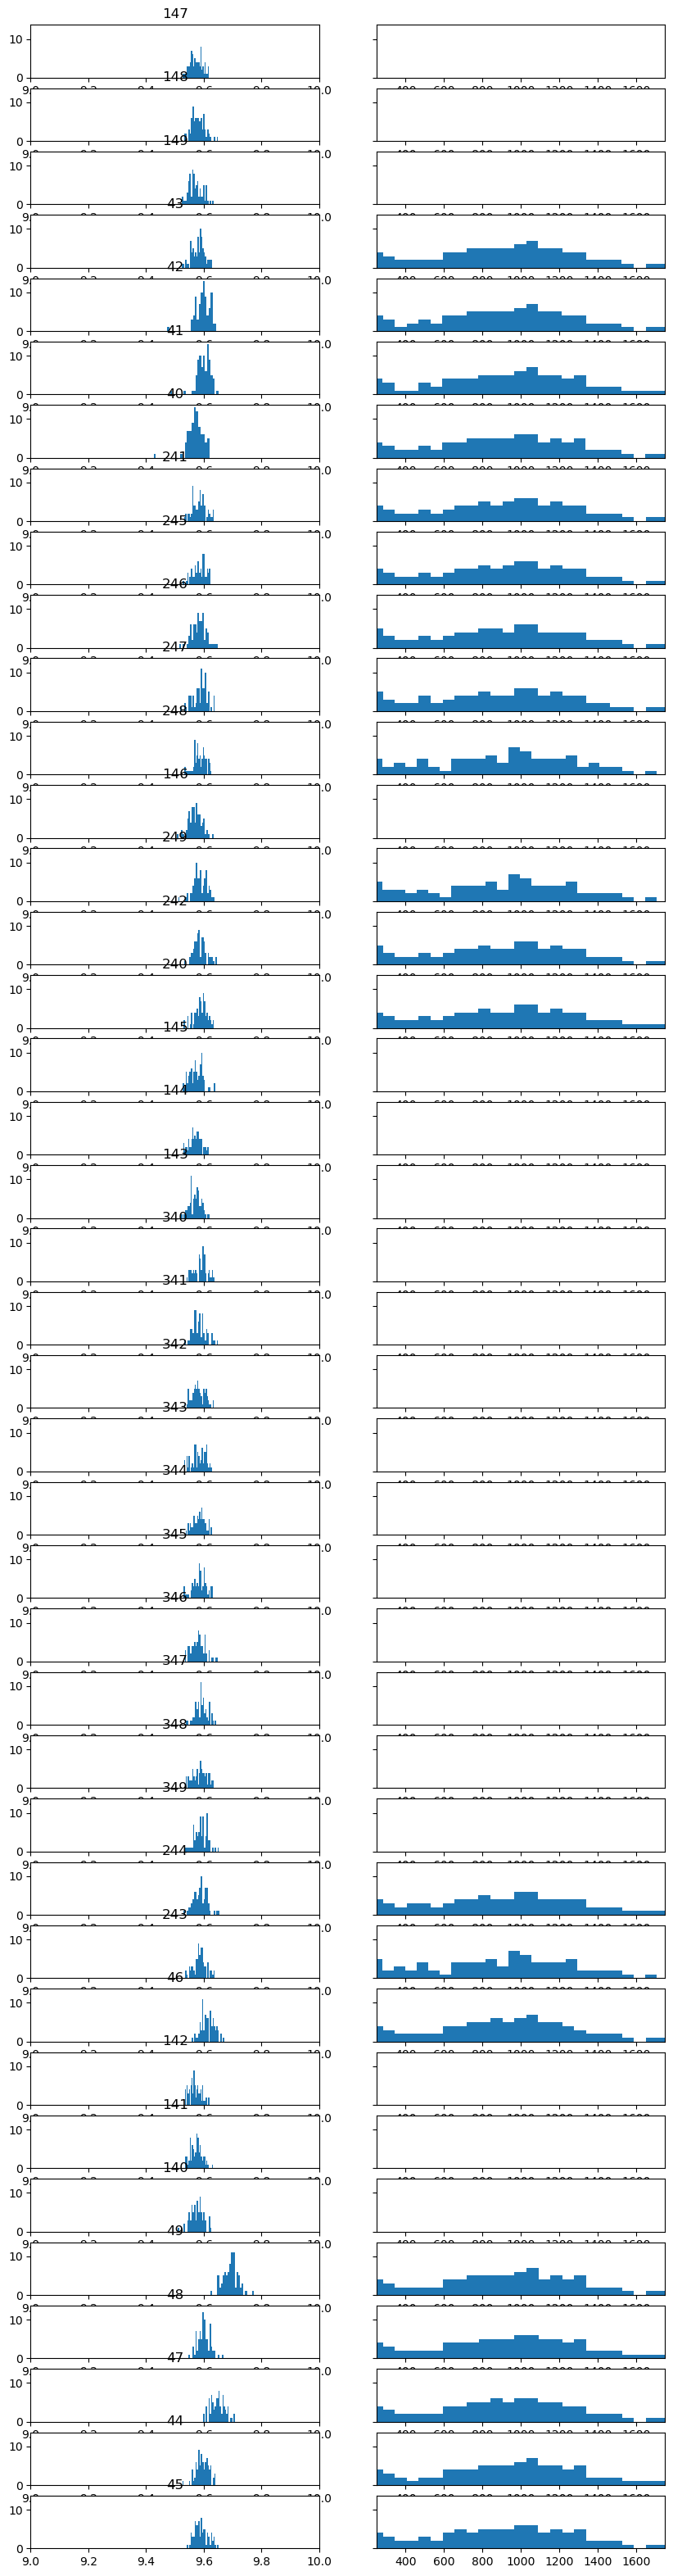

In [43]:
fig, axs = plt.subplots(40,2, sharey= True,figsize=(10,40))
for i, exp in enumerate(data):
    _ = axs[i][0].hist(exp['Ixx'].ravel(), bins=25)
    _ = axs[i][1].hist(exp['base_SdssCentroid_x'].ravel(), bins=25)
    axs[i][1].set_xlim(250,1750)
    axs[i][0].set_xlim(9,10)
    axs[i][0].set_title(f"{exp['TSEQNUM']}")

In [5]:
bad_image = data[data['SEQNUM'] == 1299][0]

(0.0, 4000.0)

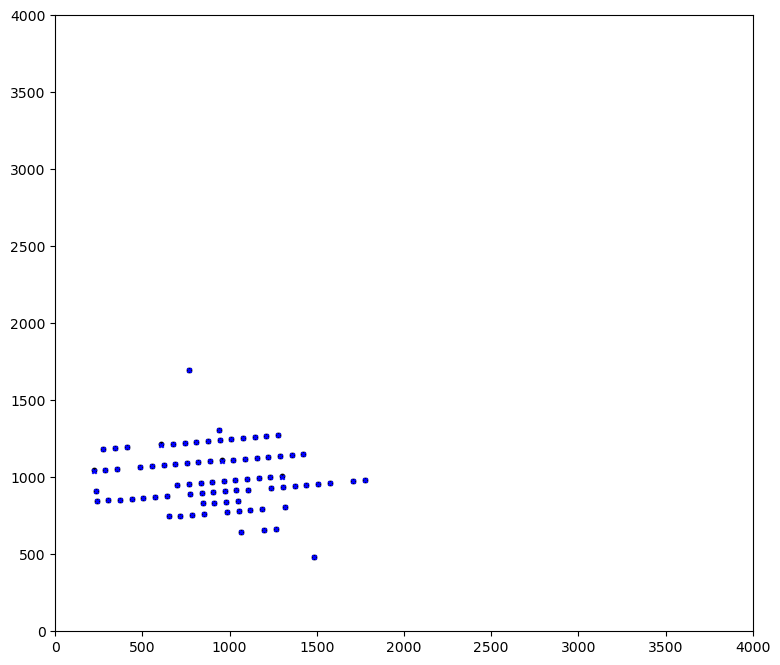

In [6]:
plt.figure(figsize=(9,8))
plt.scatter(bad_image['base_SdssCentroid_x'], bad_image['base_SdssCentroid_y'], s= 10, marker="o", color="k")
plt.scatter(bad_image['spotgrid_x'], bad_image['spotgrid_y'], s= 10, marker="x", color="b")
plt.xlim(0,4000)
plt.ylim(0,4000)

# Running from collection
________________________

In [2]:
repo = "/repo/main"
butler = Butler(repo)
registry = butler.registry

## Display collections in the repository
for collection in registry.queryCollections('u/abrought/BF/2023.05.15/run_13248/R03-S12/*'):
    print(collection)

u/abrought/BF/2023.05.15/run_13248/R03-S12/uncorrected
u/abrought/BF/2023.05.15/run_13248/R03-S12/uncorrected/20230602T071451Z
u/abrought/BF/2023.05.15/run_13248/R03-S12/corrected.optimized_scale_factor
u/abrought/BF/2023.05.15/run_13248/R03-S12/corrected.optimized_scale_factor/20230602T072929Z
u/abrought/BF/2023.05.15/run_13248/R03-S12/corrected.A23.v4
u/abrought/BF/2023.05.15/run_13248/R03-S12/corrected.A23.v4/20230612T213659Z
u/abrought/BF/2023.05.15/run_13248/R03-S12/corrected.A23
u/abrought/BF/2023.05.15/run_13248/R03-S12/corrected.A23/20230608T091905Z
u/abrought/BF/2023.05.15/run_13248/R03-S12/corrected.A23.v4/20230612T214937Z
u/abrought/BF/2023.05.15/run_13248/R03-S12/corrected.A23/20230608T093436Z
u/abrought/BF/2023.05.15/run_13248/R03-S12/corrected.A23.v2
u/abrought/BF/2023.05.15/run_13248/R03-S12/corrected.A23.v2/20230608T175852Z
u/abrought/BF/2023.05.15/run_13248/R03-S12/corrected.A23.v3
u/abrought/BF/2023.05.15/run_13248/R03-S12/corrected.A23.v3/20230608T195536Z


In [3]:
image = butler.get("postISRCCD",dataId=ref.dataId, collections=collection)

NameError: name 'ref' is not defined

In [4]:
ref = datasetRefs[1]

NameError: name 'datasetRefs' is not defined

In [6]:
config = characterizeSpots.CharacterizeSpotsConfig()
config.thresholdValue = 6.0
task = characterizeSpots.CharacterizeSpotsTask()

image = butler.get("postISRCCD",dataId=ref.dataId, collections=collection)
print(image.getMetadata()) #['exptime'])

result = task.run(image).sourceCat

DATE = "2021-12-29T12:24:39.873"
// Creation Date and Time of File
MJD = 59577.517128160
// Modified Julian Date that the file was written
RUNNUM = "13248"
// The Run Number
CCD_MANU = "ITL"
// CCD Manufacturer
CCD_TYPE = "3800C"
// CCD Model Number
TESTTYPE = "SPOT_FLAT"
// BIAS, DARK, FE55, FLAT, LAMBDA, PERSISTENCE, SP
IMGTYPE = "SPOT"
// BIAS, DARK, FE55, FLAT, FLAT_<lam>, SPOT, PPUMP
BINX = 1
// [pixels] binning along X axis
BINY = 1
// [pixels] binning along Y axis
CCDGAIN = 1.0000000000000
// Rough guess at overall system gain (e-/DNB)
CCDNOISE = 10.000000000000
// Rough guess at system noise (e- rms)
DATE-TRG = "2021-12-29T12:24:39.868"
// Date of the image trigger (readout), UTC f
MJD-TRG = 59577.517128102
// Modified Julian Date of image trigger
IMAGETAG = "4eadb15cf08ad53b"
// DAQ Image id (Hex)
CCDSLOT = "S12"
// The CCD Slot
RAFTBAY = "R03"
// The RAFT Bay
FIRMWARE = "31395007"
// DAQ firmware version (Hex)
PLATFORM = "ir2-camera"
// DAQ platform version
CONTNUM = "18ef338

/home/a/abrought/alternate_branches/mixcoatl/python/mixcoatl/characterizeSpots.py:160: FutureWarning: Call to deprecated class ExposureIdInfo. (Deprecated in favor of lsst.meas.base.CatalogIdPacker; will be removed after v27.) -- Deprecated since version v26.
  exposureIdInfo = ExposureIdInfo()


(0.0, 4000.0)

<Figure size 1000x1000 with 0 Axes>

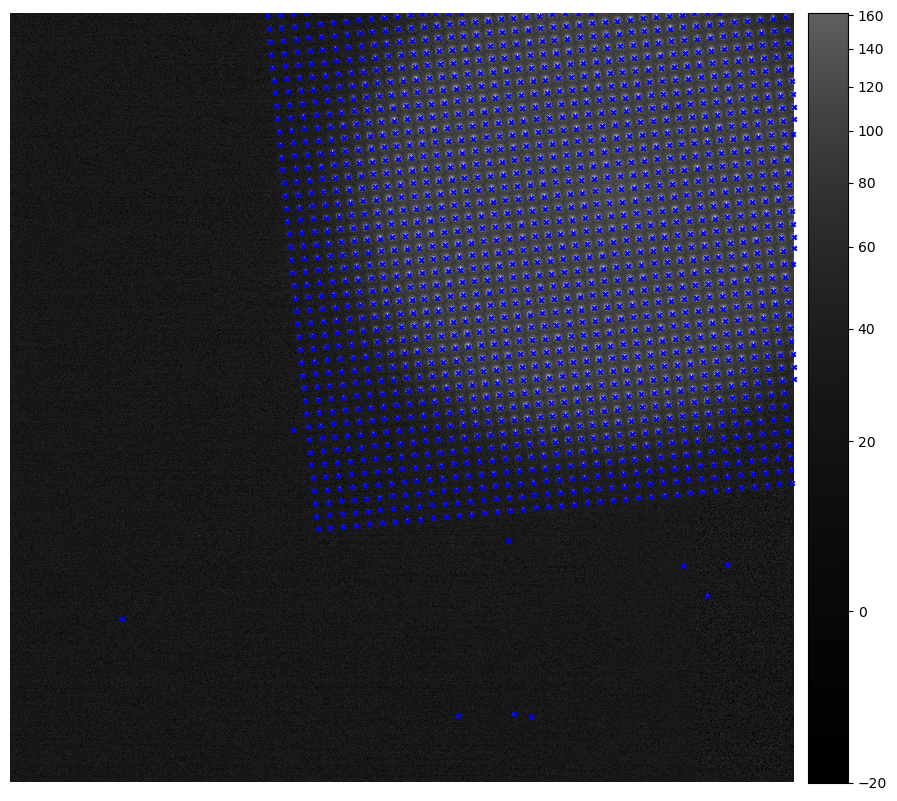

In [7]:
plt.figure(figsize=(11,10))
display(image)
plt.scatter(result['base_SdssCentroid_x'], result['base_SdssCentroid_y'], s= 10, marker="x", color="b")
plt.xlim(0,4096)
plt.ylim(0,4000)

In [8]:
config = gridFitTask.GridFitConfig()
config.distanceFromVertex = 1
config.useBOTCoordinates = True
task = gridFitTask.GridFitTask()

grid_result = task.run(result, bbox=None)


In [9]:
grid_result = grid_result.gridSourceCat

In [60]:
collection = 'u/abrought/BF/2023.06.06/run_13248/R03-S12/corrected.optimized_scale_factor'
datasetRefs = list(registry.queryDatasets(datasetType="gridSpotSrc", collections=collection))
ref = datasetRefs[0]
grid_result = butler.get("gridSpotSrc",dataId=ref.dataId, collections=collection)


 id  coord_ra coord_dec ... spotgrid_normalized_dx spotgrid_index
       rad       rad    ...                                      
---- -------- --------- ... ---------------------- --------------
 113      nan       nan ...   0.012247325304880664              0
 114      nan       nan ...   0.009227848423286894             49
 115      nan       nan ...    0.00877445034940057             98
 116      nan       nan ...   0.006861047986566396            147
 117      nan       nan ...   0.008120159258880957            196
 118      nan       nan ...   0.005183565062295281            245
 119      nan       nan ...   0.004476899910848204            294
 121      nan       nan ...   0.005167964496556827            343
 122      nan       nan ...   0.004133053816482862            392
 123      nan       nan ...  0.0025375055243455577            441
 ...      ...       ... ...                    ...            ...
1695      nan       nan ...  -0.004558694417319617           1067
1696      

(0.0, 4000.0)

<Figure size 1000x1000 with 0 Axes>

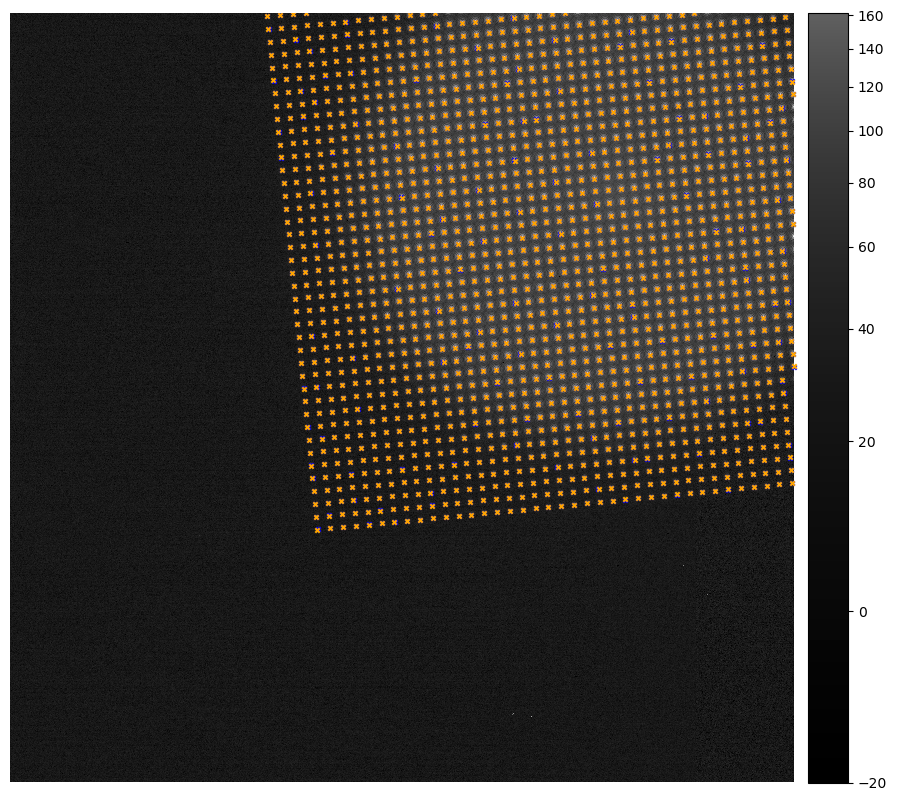

In [11]:
plt.figure(figsize=(11,10))
display(image)
plt.scatter(grid_result['base_SdssCentroid_x'], grid_result['base_SdssCentroid_y'], s= 10, marker="x", color="b")
plt.scatter(grid_result['spotgrid_x'], grid_result['spotgrid_y'], s= 10, marker="x", color="orange")

plt.xlim(0,4096)
plt.ylim(0,4000)

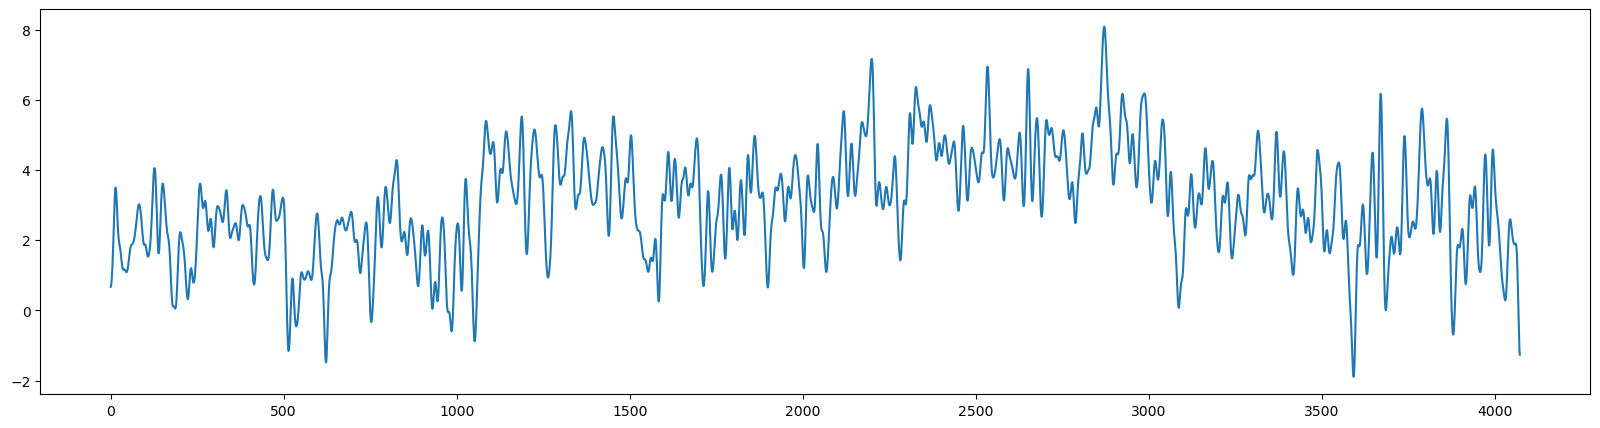

In [12]:
from scipy.ndimage import gaussian_filter
plt.figure(figsize=(20,5))
h = plt.plot(gaussian_filter(image.getImage().array[1000,:], 5.0))

In [13]:
#fluxCutThreshold = 0.95
#maxFlux = np.nanmax(grid_result['base_SdssShape_instFlux'])
#thresh = np.percentile(grid_result['base_SdssShape_instFlux'], fluxCutThreshold*100)
##select = src['base_SdssShape_instFlux'] >= self.fluxCutThreshold*maxFlux
#select = grid_result['base_SdssShape_instFlux'] >= thresh

centerCutRadius = 5
d = butler.get("gridSpotSrc",dataId=ref.dataId, collections=collection)
md = d.getMetadata()
x0 = md['GRID_X0']
y0 = md['GRID_Y0']
maxradius = centerCutRadius * 65.
distances = np.sqrt((grid_result["spotgrid_x"] - x0)**2 + (grid_result["spotgrid_y"] - y0)**2)
select = (distances <= maxradius)

src  = grid_result.subset(select)

(0.0, 4000.0)

<Figure size 1000x1000 with 0 Axes>

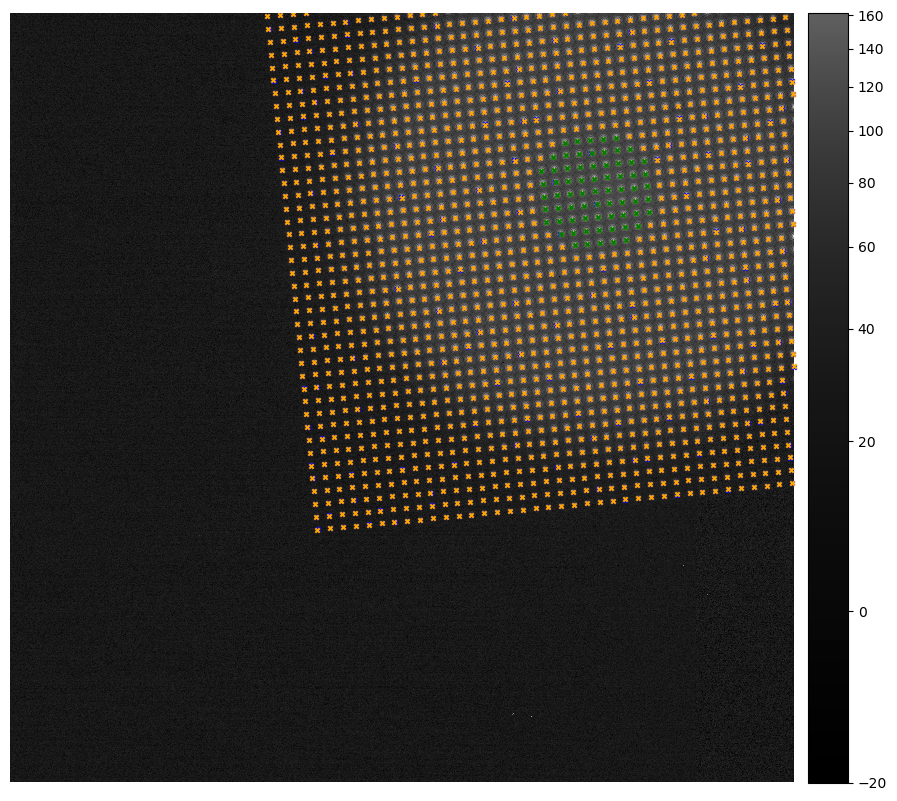

In [14]:
plt.figure(figsize=(11,10))
display(image)
plt.scatter(grid_result['base_SdssCentroid_x'], grid_result['base_SdssCentroid_y'], s= 10, marker="x", color="b")
plt.scatter(grid_result['spotgrid_x'], grid_result['spotgrid_y'], s= 10, marker="x", color="orange")
plt.scatter(src['spotgrid_x'], src['spotgrid_y'], s= 10, marker="x", color="green")
plt.xlim(0,4096)
plt.ylim(0,4000)

In [15]:
def calc2ndMom(results):
    # Calculate Second Moments
    e1 = results.observed_shape.e1
    e2 = results.observed_shape.e2
    sigma = results.moments_sigma
    sigma_ave = sigma / (1 - e1**2 - e2**2 )**(0.25) 
    Ixx = (1+e1) * sigma_ave**2
    Iyy = (1-e1) * sigma_ave**2
    Ixy = e2 * (sigma_ave**2) 
    
    return Ixx, Iyy, Ixy

stamp = []
s = 2 * int(65/2.)
Ixx = np.zeros(len(src))
Iyy = np.zeros(len(src))
Ixy = np.zeros(len(src))
for i,pt in enumerate(src["spotgrid_index"]):
    x = int(src['base_SdssCentroid_y'][i]) # The coordinate systems are flipped
    y = int(src['base_SdssCentroid_x'][i])
    

    xmin = max(0,x-s)
    xmax = min(image.getImage().array.shape[0]-1, x+s+1)
    ymin = max(0,y-s)
    ymax = min(image.getImage().array.shape[1]-1, y+s+1)
    stamp_center = [src['base_SdssCentroid_x'][i] - ymin, src['base_SdssCentroid_y'][i] - xmin]

    if i==0:
        stamp = image.getImage().array[xmin:xmax,ymin:ymax]
        print(f"{xmin}:{xmax},{ymin}:{ymax}")
    PSFImage = galsim.Image(image.getImage().array[xmin:xmax,ymin:ymax]) #/ gains[amp.getName()])

    # Calculate moments
    result = PSFImage.FindAdaptiveMom(strict=False)
    if result.error_message != "":
        Ixx[i] = -np.nan
        Iyy[i] = -np.nan
        Ixy[i] = -np.nan
    else:
        Ixx_, Iyy_, Ixy_ = calc2ndMom(result)
        Ixx[i] = Ixx_
        Iyy[i] = Iyy_
        Ixy[i] = Ixy_

2726:2855,2868:2997


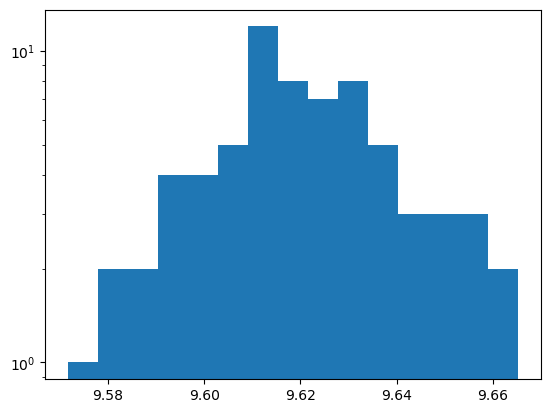

In [16]:
_ = plt.hist(Ixx.ravel(), log=True, bins=15)

(129, 129)


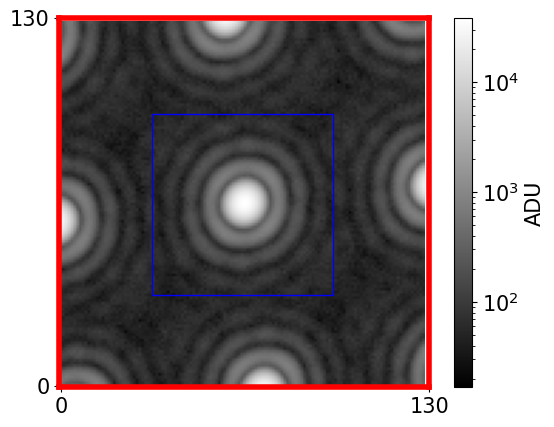

In [50]:
s = int(65/2.)
from matplotlib.colors import LogNorm
import matplotlib
matplotlib.rcParams.update({'font.size': 15})
print(stamp.shape)
im = plt.imshow(stamp, norm=LogNorm(), cmap="gray", origin='lower')
import matplotlib.patches as patches
# Create a Rectangle patch
rect1 = patches.Rectangle((2*s-int(s-s/2), 2*s-int(s-s/2)), s,s, linewidth=1, edgecolor='r', facecolor='none')
rect2 = patches.Rectangle((2*s-int(2*s-s), 2*s-int(2*s-s)), 2*s,2*s, linewidth=1, edgecolor='r',linestyle="--", facecolor='none')
# Add the patch to the Axes
#plt.gca().add_patch(rect1)
plt.gca().add_patch(rect2)
cbar = plt.colorbar()
cbar.ax.set_ylabel("ADU")
_ = plt.xticks([0,130])
_ = plt.yticks([0,130])
plt.gca().spines['right'].set_color('red') #.set_visible(False)
plt.gca().spines['right'].set_linewidth(4)
plt.gca().spines['bottom'].set_color('red') #.set_visible(False)
plt.gca().spines['bottom'].set_linewidth(4)
plt.gca().spines['top'].set_color('red') #.set_visible(False)
plt.gca().spines['top'].set_linewidth(4)
plt.gca().spines['left'].set_color('red') #.set_visible(False)
plt.gca().spines['left'].set_linewidth(4)
plt.savefig("../plots/example_spot_image_small.png", bbox_inches='tight')

(4000, 4072)


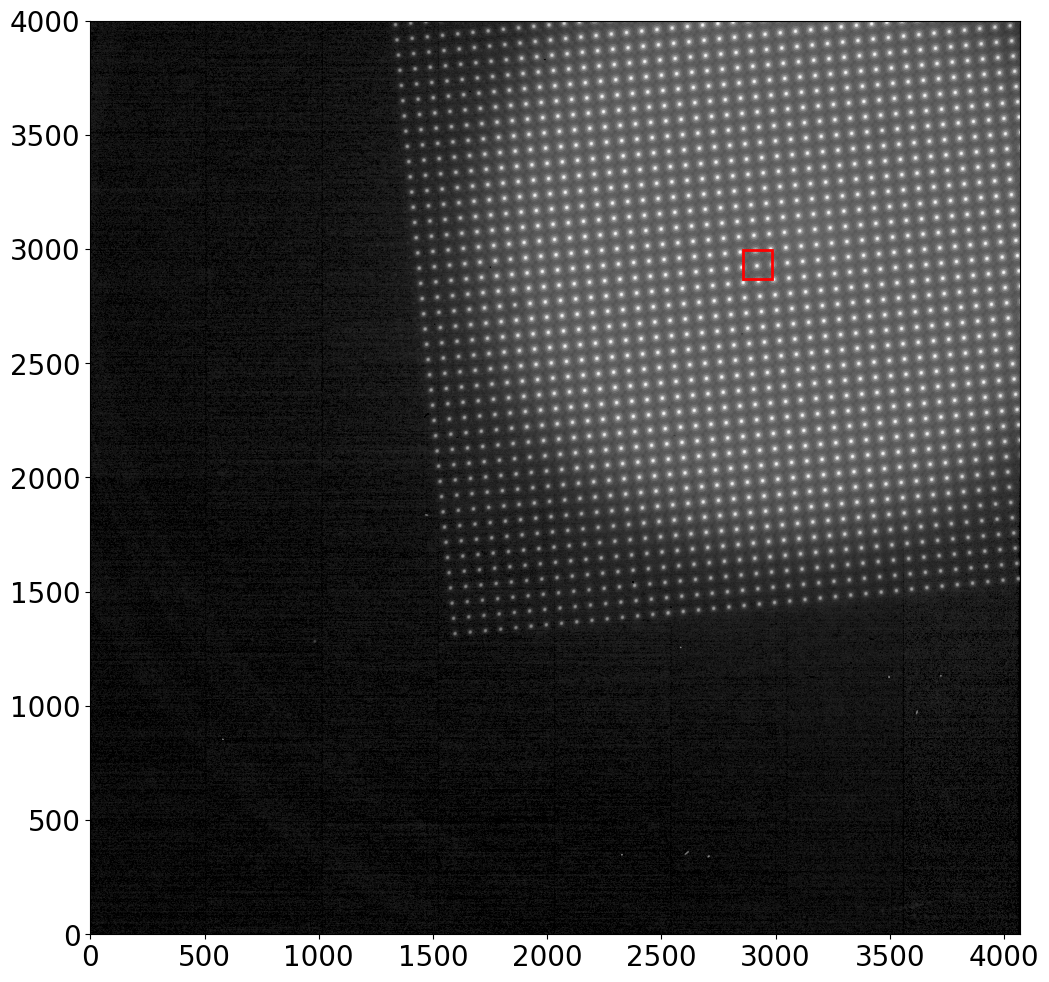

In [52]:
plt.figure(figsize=(12,12))
im = plt.imshow(image.getImage().array, cmap='gray',norm='asinh', vmin=1, origin='lower')
print(image.getImage().array.shape)
rectangle = patches.Rectangle((2726+130,2868),997-868,814-685, linewidth=2, edgecolor='r', facecolor='none')
plt.gca().add_patch(rectangle)
#cax = fig.add_axes([0.9, 0.8, 0.5, 0.05])
_ =plt.xticks([0,500,1000,1500,2000,2500,3000,3500,4000], fontsize=20)
_ =plt.yticks([0,500,1000,1500,2000,2500,3000,3500,4000], fontsize=20)
plt.savefig("../plots/example_spot_image.png", bbox_inches='tight')
#plt.scale('asinh')
#685:814,868:997

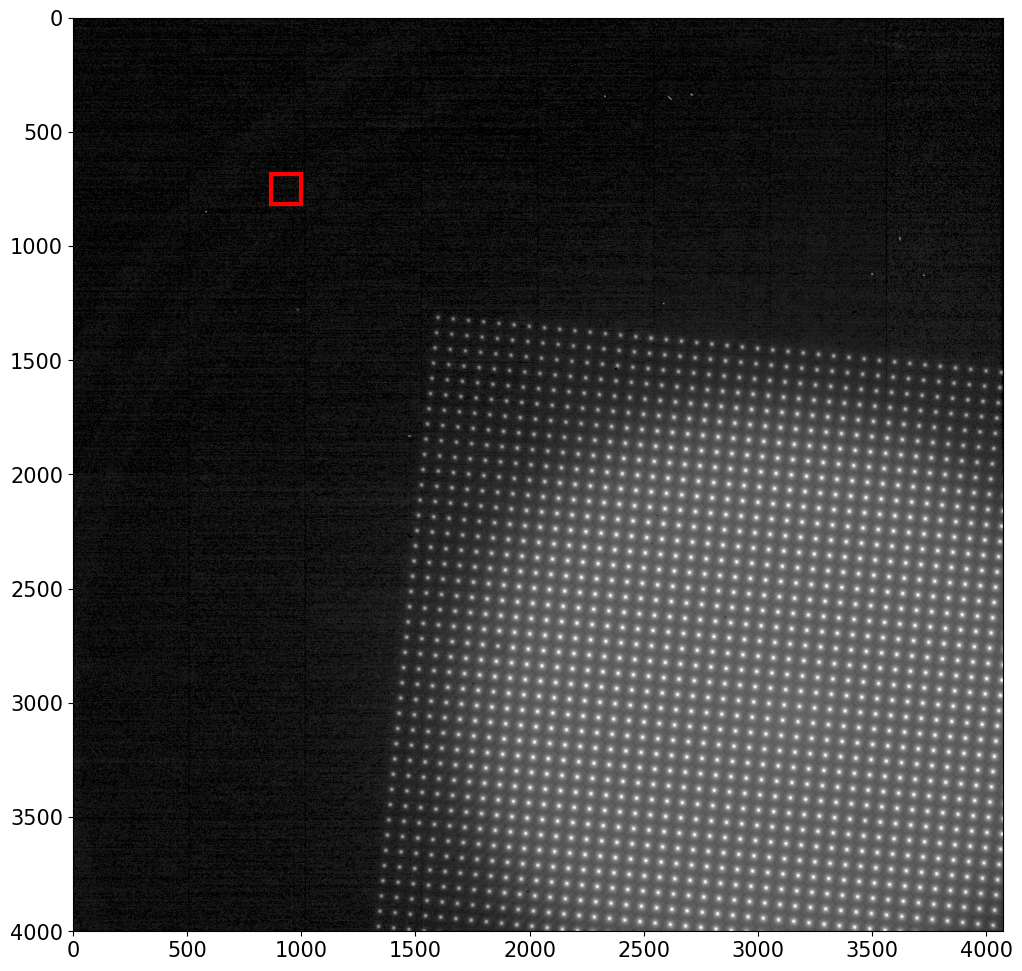

In [24]:
plt.figure(figsize=(12,12))
im = plt.imshow(image.getImage().array, cmap='gray',norm='asinh', vmin=1)
rectangle = patches.Rectangle((868,685), 814-685,997-868, linewidth=3, edgecolor='r', facecolor='none')
#circle    = patches.Circle((x0,y0), radius=5*65.5, linewidth=3, edgecolor="green", facecolor='none')
plt.gca().add_patch(rectangle)
#plt.gca().add_patch(circle)
#cax = fig.add_axes([0.9, 0.8, 0.5, 0.05])
_ =plt.xticks([0,500,1000,1500,2000,2500,3000,3500,4000], fontsize=15)
_ =plt.yticks([0,500,1000,1500,2000,2500,3000,3500,4000], fontsize=15)
#plt.scale('asinh')
#685:814,868:997

7.4630060184001925


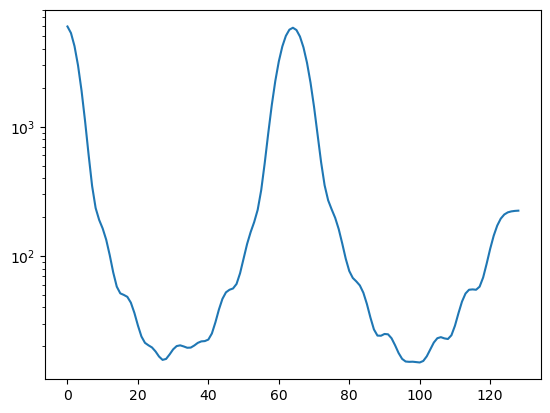

In [163]:
plt.plot(gaussian_filter(stamp[:,:], 2.0)[60,:])

PSFImage = galsim.Image(stamp) #/ gains[amp.getName()])
# Calculate moments
moms = PSFImage.FindAdaptiveMom(strict=False)
print(moms.moments_sigma * 2.355)
plt.yscale('log')

# Correction!
_____________



In [59]:
def avg_kernels(d):
    t = np.zeros(d["C00"].shape)
    for k in d.values():
        t += k
    return t / len(d.values())

def transferFlux(cFunc, fStep, correctionMode=True):
    """Take the input convolved deflection potential and the flux array
    to compute and apply the flux transfer into the correction array.
    Parameters
    ----------
    cFunc: `np.array`
        Deflection potential, being the convolution of the flux F with the
        kernel K.
    fStep: `np.array`
        The array of flux values which act as the source of the flux transfer.
    correctionMode: `bool`
        Defines if applying correction (True) or generating sims (False).
    Returns
    -------
    corr:
        BFE correction array
    """

    if cFunc.shape != fStep.shape:
        raise RuntimeError(f'transferFlux: array shapes do not match: {cFunc.shape}, {fStep.shape}')

    # set the sign of the correction and set its value for the
    # time averaged solution
    if correctionMode:
        # negative sign if applying BFE correction
        factor = -0.5
    else:
        # positive sign if generating BFE simulations
        factor = 0.5

    # initialise the BFE correction image to zero
    corr = np.zeros_like(cFunc)

    # Generate a 2D mesh of x,y coordinates
    yDim, xDim = cFunc.shape
    y = np.arange(yDim, dtype=int)
    x = np.arange(xDim, dtype=int)
    xc, yc = np.meshgrid(x, y)

    # process each axis in turn
    for ax in [0, 1]:

        # gradient of phi on right/upper edge of pixel
        diff = np.diff(cFunc, axis=ax)

        # expand array back to full size with zero gradient at the end
        gx = np.zeros_like(cFunc)
        yDiff, xDiff = diff.shape
        gx[:yDiff, :xDiff] += diff

        # select pixels with either positive gradients on the right edge,
        # flux flowing to the right/up
        # or negative gradients, flux flowing to the left/down
        for i, sel in enumerate([gx > 0, gx < 0]):
            xSelPixels = xc[sel]
            ySelPixels = yc[sel]
            # and add the flux into the pixel to the right or top
            # depending on which axis we are handling
            if ax == 0:
                xPix = xSelPixels
                yPix = ySelPixels+1
            else:
                xPix = xSelPixels+1
                yPix = ySelPixels
            # define flux as the either current pixel value or pixel
            # above/right
            # depending on whether positive or negative gradient
            if i == 0:
                # positive gradients, flux flowing to higher coordinate values
                flux = factor * fStep[sel]*gx[sel]
            else:
                # negative gradients, flux flowing to lower coordinate values
                flux = factor * fStep[yPix, xPix]*gx[sel]
            # change the fluxes of the donor and receiving pixels
            # such that flux is conserved
            corr[sel] -= flux
            corr[yPix, xPix] += flux

    # return correction array
    return corr

def applyFluxConservingC18(kernel, img, maxIter=10000, threshold=10):
    # Implemented by Lance Miller
    
    # get kernel and its shape
    kLy, kLx = kernel.shape
    kernelImage = afwImage.ImageD(kLx, kLy)
    kernelImage.getArray()[:, :] = kernel
    image = afwImage.ImageD(img.shape[0], img.shape[1])
    image.getArray()[:, :] = img
    tempImage = image.clone()
    tempImage = image.clone()

    nanIndex = np.isnan(tempImage.getArray())
    tempImage.getArray()[nanIndex] = 0.

    outImage = afwImage.ImageF(image.getDimensions())
    corr = np.zeros_like(image.getArray())
    prevImage = np.zeros_like(image.getArray())
    convCntrl = afwMath.ConvolutionControl(False, False, 1)
    print(help(afwMath.ConvolutionControl))
    fixedKernel = afwMath.FixedKernel(kernelImage)

    # set the padding amount
    # ensure we pad by an even amount larger than the kernel
    kLy = 2 * ((1+kLy)//2)
    kLx = 2 * ((1+kLx)//2)

    # The deflection potential only depends on the gradient of
    # the convolution, so we can subtract the mean, which then
    # allows us to pad the image with zeros and avoid wrap-around effects
    # (although still not handling the image edges with a physical model)
    # This wouldn't be great if there were a strong image gradient.
    imydim, imxdim = tempImage.array.shape
    imean = np.mean(tempImage.getArray()[~nanIndex])
    # subtract mean from image
    tempImage -= imean
    tempImage.array[nanIndex] = 0.
    padArray = np.pad(tempImage.getArray(), ((0, kLy), (0, kLx)))

    outImage = afwImage.ImageF(np.pad(outImage.getArray(), ((0, kLy), (0, kLx))))
    
    # Convert array to afw image so afwMath.convolve works
    padImage = afwImage.ImageF(padArray.shape[1], padArray.shape[0])
    padImage.array[:] = padArray

    for iteration in range(maxIter):

        # create deflection potential, convolution of flux with kernel
        # using padded counts array

        afwMath.convolve(outImage, padImage, fixedKernel, convCntrl)
        tmpArray = tempImage.getArray()
        outArray = outImage.getArray()

        # trim convolution output back to original shape
        outArray = outArray[:imydim, :imxdim]

        # generate the correction array, with correctionMode set as input
        corr[...] = transferFlux(outArray, tmpArray, correctionMode=True)

        # update the arrays for the next iteration
        tmpArray[:, :] = image.getArray()[:, :]
        tmpArray += corr
        tmpArray[nanIndex] = 0.
        # update padded array
        # subtract mean
        tmpArray -= imean
        tempImage.array[nanIndex] = 0.
        padArray = np.pad(tempImage.getArray(), ((0, kLy), (0, kLx)))

        if iteration > 0:
            diff = np.sum(np.abs(prevImage - tmpArray))

            if diff < threshold:
                break
            prevImage[:, :] = tmpArray[:, :]

    image.getArray()[:] += corr[:]
    
    return image, iteration

# The image needs to be units of electrons/holes

def applyC18(kernel, img, maxIter=10000, threshold = 10.):

    kLx = np.shape(kernel)[0]
    kLy = np.shape(kernel)[1]
    kernelImage = afwImage.ImageD(kLx, kLy)
    kernelImage.getArray()[:, :] = kernel
    image = afwImage.ImageD(img.shape[0], img.shape[1])
    image.getArray()[:, :] = img
    tempImage = image.clone()

    nanIndex = np.isnan(tempImage.getArray())
    tempImage.getArray()[nanIndex] = 0.

    outImage = afwImage.ImageD(image.getDimensions())
    corr = np.zeros_like(image.getArray())
    prev_image = np.zeros_like(image.getArray())
    convCntrl = afwMath.ConvolutionControl(False, True, 1)
    fixedKernel = afwMath.FixedKernel(kernelImage)

    # Define boundary by convolution region.  The region that the
    # correction will be calculated for is one fewer in each dimension
    # because of the second derivative terms.
    # NOTE: these need to use integer math, as we're using start:end as
    # np index ranges.
    startX = kLx//2
    endX = -kLx//2
    startY = kLy//2
    endY = -kLy//2
    

    for iteration in range(maxIter):
        print(outImage.getArray().shape, tempImage.getArray().shape, fixedKernel.getArray.shape())
        afwMath.convolve(outImage, tempImage, fixedKernel, convCntrl)
        print(outImage.getArray().shape, tempImage.getArray().shape, fixedKernel.getArray.shape())
        tmpArray = tempImage.getArray()
        outArray = outImage.getArray()

        with np.errstate(invalid="ignore", over="ignore"):
            # First derivative term
            gradTmp = np.gradient(tmpArray[startY:endY, startX:endX])
            gradOut = np.gradient(outArray[startY:endY, startX:endX])
            first = (gradTmp[0]*gradOut[0] + gradTmp[1]*gradOut[1])[1:-1, 1:-1]

            # Second derivative term
            diffOut20 = np.diff(outArray, 2, 0)[startY:endY, startX + 1:endX - 1]
            diffOut21 = np.diff(outArray, 2, 1)[startY + 1:endY - 1, startX:endX]
            second = tmpArray[startY + 1:endY - 1, startX + 1:endX - 1]*(diffOut20 + diffOut21)

            corr[startY + 1:endY - 1, startX + 1:endX - 1] = 0.5*(first + second)

            tmpArray[:, :] = image.getArray()[:, :]
            tmpArray[nanIndex] = 0.
            tmpArray[startY:endY, startX:endX] += corr[startY:endY, startX:endX]

        #if iteration > 0:
        diff = np.sum(np.abs(prev_image - tmpArray))
        print(iteration, diff)
        if diff < threshold:
            break
        prev_image[:, :] = tmpArray[:, :]

    image.getArray()[startY + 1:endY - 1, startX + 1:endX - 1] += corr[startY + 1:endY - 1, startX + 1:endX - 1]
    
    return image, iteration


In [34]:
# Get the kernel
bfk = butler.get('bfk', detector=23, instrument='LSSTCam', collections='u/abrought/BF/2023.04.28/bfk.2023.04.28.R03-S12.trunc_to_pcti.amatrix.noCorrModel')
kernel = avg_kernels(bfk.ampKernels)

image_corrected, iterations = applyFluxConservingC18(kernel, image.getImage().array, threshold=1.0)

ValueError: could not broadcast input array from shape (4000,4072) into shape (4072,4000)

In [31]:
image

In [112]:
src

<class 'lsst.afw.table.SourceCatalog'>
Non-contiguous afw.Catalog of 69 rows.
columns: id coord_ra coord_dec parent base_SdssCentroid_x base_SdssCentroid_y base_SdssCentroid_xErr base_SdssCentroid_yErr base_SdssCentroid_flag base_SdssCentroid_flag_edge base_SdssCentroid_flag_noSecondDerivative base_SdssCentroid_flag_almostNoSecondDerivative base_SdssCentroid_flag_notAtMaximum base_SdssCentroid_flag_near_edge base_SdssCentroid_flag_resetToPeak base_SdssCentroid_flag_badError base_SdssShape_xx base_SdssShape_yy base_SdssShape_xy base_SdssShape_xxErr base_SdssShape_yyErr base_SdssShape_xyErr base_SdssShape_x base_SdssShape_y base_SdssShape_instFlux base_SdssShape_instFluxErr base_SdssShape_psf_xx base_SdssShape_psf_yy base_SdssShape_psf_xy base_SdssShape_instFlux_xx_Cov base_SdssShape_instFlux_yy_Cov base_SdssShape_instFlux_xy_Cov base_SdssShape_flag base_SdssShape_flag_unweightedBad base_SdssShape_flag_unweighted base_SdssShape_flag_shift base_SdssShape_flag_maxIter base_SdssShape_flag_p

In [10]:
repo = "/repo/main"
butler = Butler(repo)
registry = butler.registry

## Display collections in the repository
for collection in registry.queryCollections('u/abrought/BF/2023.05.15/run_13248/R03-S12/*'):
    print(collection)

u/abrought/BF/2023.05.15/run_13248/R03-S12/corrected.optimized_scale_factor
u/abrought/BF/2023.05.15/run_13248/R03-S12/corrected.optimized_scale_factor/20230601T020850Z
u/abrought/BF/2023.05.15/run_13248/R03-S12/uncorrected
u/abrought/BF/2023.05.15/run_13248/R03-S12/uncorrected/20230521T194030Z
u/abrought/BF/2023.05.15/run_13248/R03-S12/corrected.cov_model_pcti
u/abrought/BF/2023.05.15/run_13248/R03-S12/corrected.cov_model_pcti/20230525T030448Z
u/abrought/BF/2023.05.15/run_13248/R03-S12/corrected.cov_model_ptc
u/abrought/BF/2023.05.15/run_13248/R03-S12/corrected.cov_model_ptc/20230525T033756Z


In [25]:
collection = 'u/abrought/BF/2023.05.15/run_13248/R03-S12/corrected.optimized_scale_factor'
datasetRefs = list(registry.queryDatasets(datasetType="postISRCCD", collections=collection))

ref = datasetRefs[3]
#for datasetRef in datasetRefs:
#    if datasetRef.to_simple().dataId.__dict__['dataId']['exposure'] == 3021122900049:
#        ref = datasetRef
#        break

In [26]:
data = butler.get("gridSpotSrc",dataId=ref.dataId, collections=collection)

In [27]:
image = butler.get("postISRCCD",dataId=ref.dataId, collections=collection)

(0.0, 4000.0)

<Figure size 1000x1000 with 0 Axes>

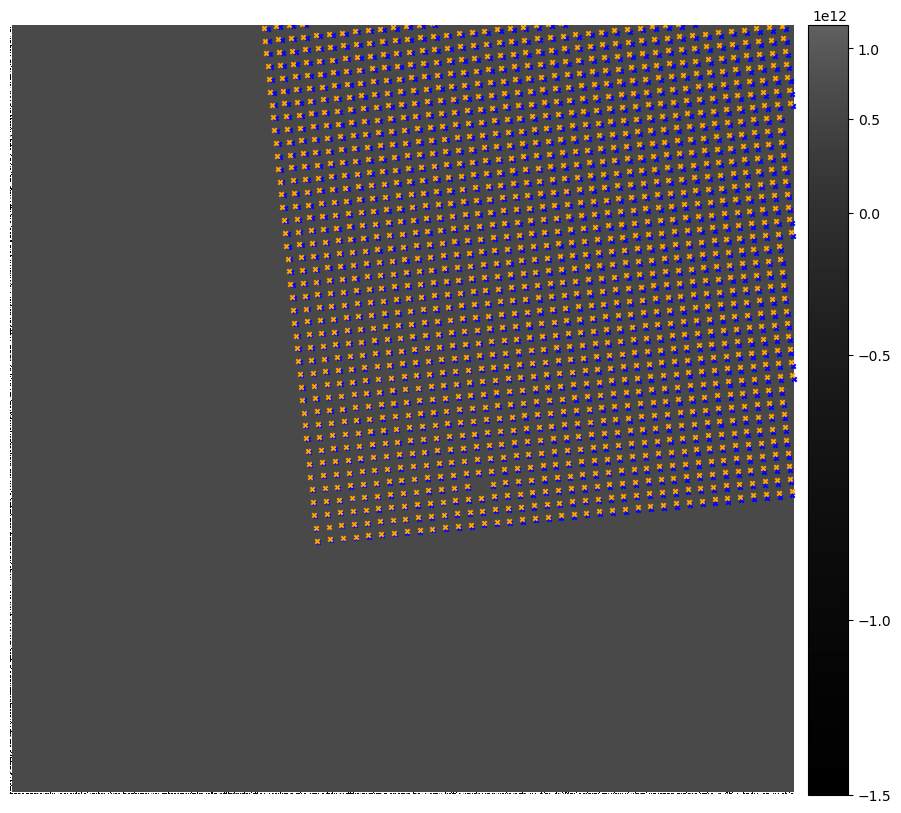

In [31]:
plt.figure(figsize=(11,10))
display(image)
plt.scatter(data['base_SdssCentroid_x'], data['base_SdssCentroid_y'], s= 10, marker="x", color="b")
plt.scatter(data['spotgrid_x'], data['spotgrid_y'], s= 10, marker="x", color="orange")
#plt.scatter(src['spotgrid_x'], src['spotgrid_y'], s= 10, marker="x", color="green")
plt.xlim(0,4096)
plt.ylim(0,4000)